# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [5]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
male_df = data.loc[data['Gender'] == 'Male'] 
female_df = data.loc[data['Gender'] == 'Female']

print('Male Height mean: ', male_df.Height.mean())
print('Male Height sd: ', male_df.Height.std())
print('Male Weight mean: ', male_df.Weight.mean())
print('Male Weight sd: ', male_df.Weight.std())
print('Female Height mean: ', female_df.Height.mean())
print('Female Height sd: ', female_df.Height.std())
print('Female Weight mean: ', female_df.Weight.mean())
print('Female Weight sd: ', female_df.Weight.std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621741
Male Height sd:  2.863362228660647
Male Weight mean:  187.0206206581932
Male Weight sd:  19.7811545167638
Female Height mean:  63.70877360342507
Female Height sd:  2.696284015765054
Female Weight mean:  135.86009300746835
Female Weight sd:  19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

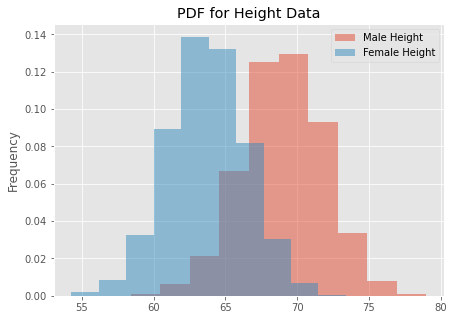

In [8]:
plt.figure(figsize=(7,5))
male_df.Height.plot.hist(bins = 10, density = True, label = 'Male Height', alpha = 0.5)
female_df.Height.plot.hist(bins = 10, density = True, label = 'Female Height', alpha = 0.5)
plt.ylabel('Frequency')
plt.legend()
plt.title('PDF for Height Data')
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?
# Heights are normally distributed
# There more taller men than women
# There are common observations in height between 65 - 70
#

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

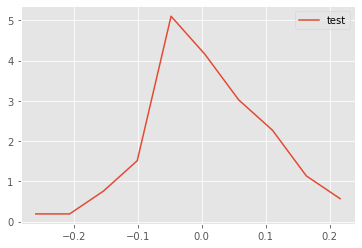

In [10]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5 * (bins[k] + bins[k + 1])
        pdfy[k] = n[k]
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

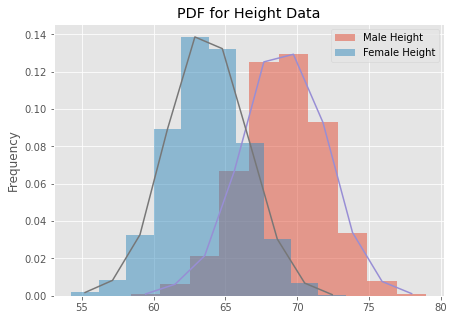

In [12]:
plt.figure(figsize=(7,5))
male_df.Height.plot.hist(bins = 10, density = True, label = 'Male Height', alpha = 0.5)
female_df.Height.plot.hist(bins = 10, density = True, label = 'Female Height', alpha = 0.5)
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.ylabel('Frequency')
plt.legend()
plt.title('PDF for Height Data')
plt.show()

## Repeat the above exercise for male and female weights

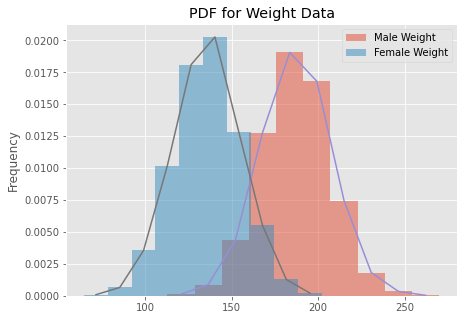

In [13]:
plt.figure(figsize=(7,5))
male_df.Weight.plot.hist(bins = 10, density = True, label = 'Male Weight', alpha = 0.5)
female_df.Weight.plot.hist(bins = 10, density = True, label = 'Female Weight', alpha = 0.5)
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.ylabel('Frequency')
plt.legend()
plt.title('PDF for Weight Data')
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# Common weight between both ranges from 150 to ~180lbs
# Males frequent around ~180lbs and for females its around ~140
# Males weight a bit more then most women

# What is the takeaway when comparing male and female heights and weights?
# It is easy to distinguish weight than height between the male and female

## Repeat the above experiments in seaborn and compare with your results

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

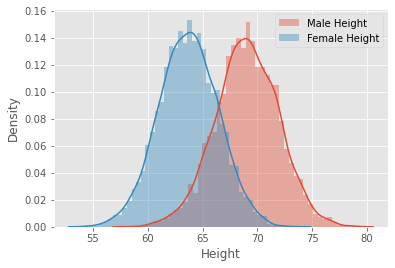

In [20]:
sns.distplot(male_df.Height, label = 'Male Height')
sns.distplot(female_df.Height, label = 'Female Height')
plt.legend()
plt.show()

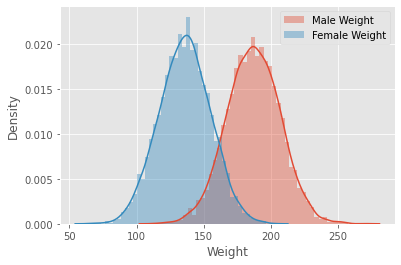

In [21]:
sns.distplot(male_df.Weight, label = 'Male Weight')
sns.distplot(female_df.Weight, label = 'Female Weight')
plt.legend()
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# The bell curve in both looks very similar as does the shape of the data.
# With seaborn you can easily visualize the aspects of distributions

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.